## Correlation anaylsis


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in filtered data
file_path = 'data/filtered_data.csv'
df = pd.read_csv(file_path)
df.shape

(26141, 47)

In [4]:
print("Number of user IDs",len(df['userID'].unique()))

Number of user IDs 1918


In [5]:
# Read in NLP text classification data
file_path = 'data/text_df.csv'
text_df = pd.read_csv(file_path)
text_df = text_df.drop(columns=['userID', 'label'])
text_df.head()

,ID,work_affected
0,276,1
1,278,1
2,288,0
3,299,1
4,300,0


In [6]:
df = pd.merge(df, text_df, on='ID', how='left')
df.shape

(26141, 48)

In [7]:
# Check for correlations between variables

In [8]:
# Compute the correlation matrix for numeric columns
corr_matrix = df[['period', 'sex', 'period_intensity', 'pain_level', 'backaches', 'bodyaches',  
                  'stomach_cramps', 'joint_pains', 'tender_breasts', 'overall_pain', 'headache',
                  'indigestion', 'bloating', 'constipation', 'diarrhea', 'nausea', 'vomiting', 
                  'appetite_loss', 'cravings_salty', 'cravings_sweet', 'weight',
                  'skin_changes', 'acne', 'tiredness', 'dizziness', 'pins_and_needles',
                  'temperature',   'fever', 'hot_flashes', 'short_of_breath', 'coughing', 
                  'insomnia', 'sleep', 'steps', 'water', 'work_affected']].corr()

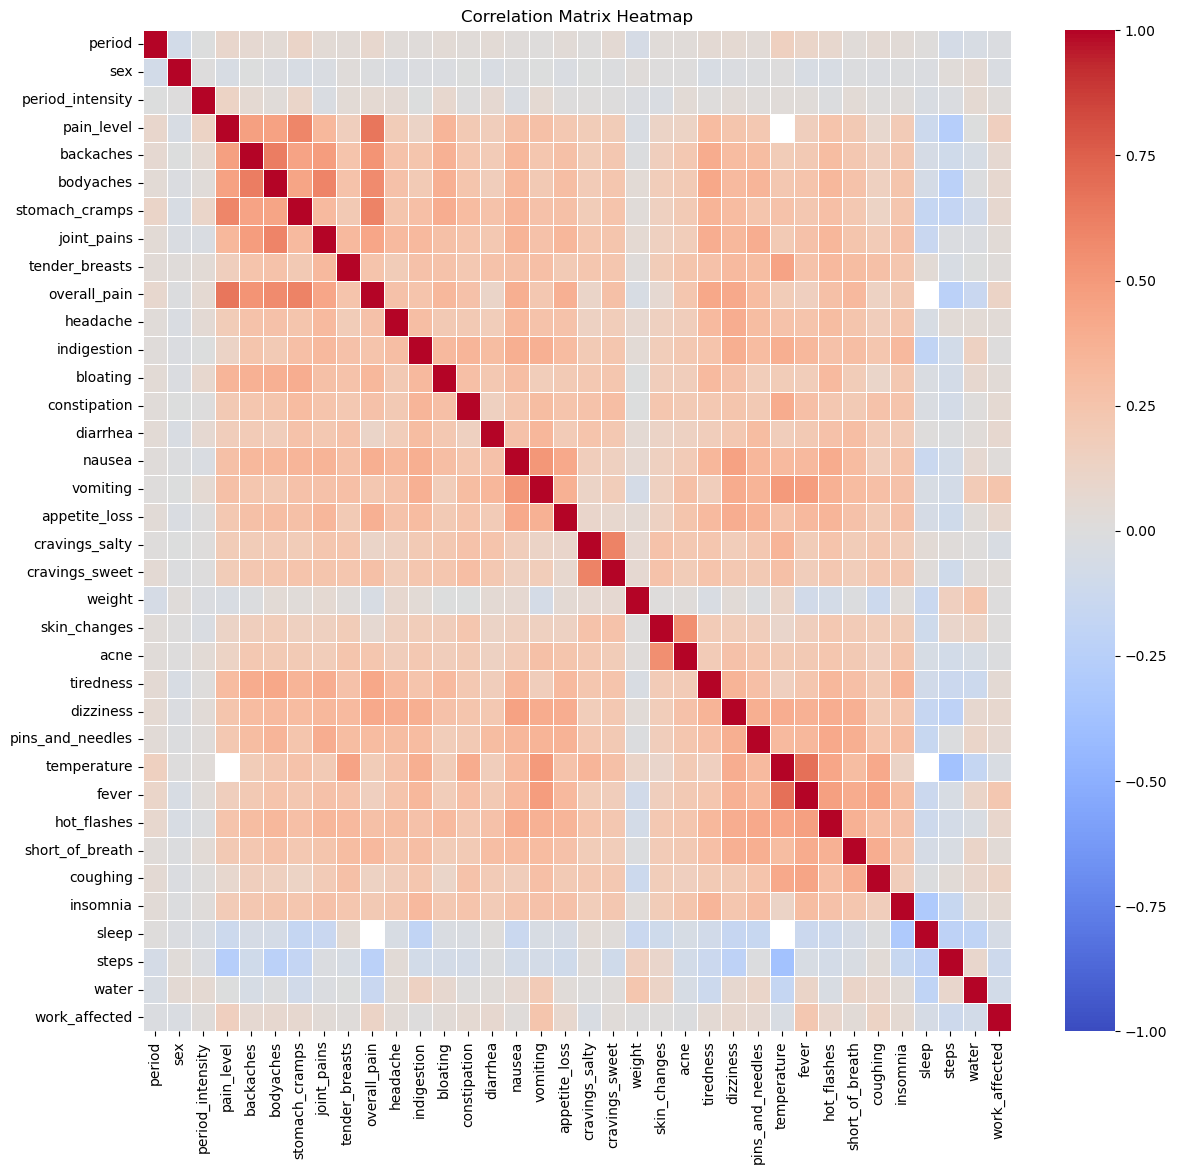

In [9]:
# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(14, 13))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.savefig('fig/corr_heatmap.png', dpi=300)  
plt.show()

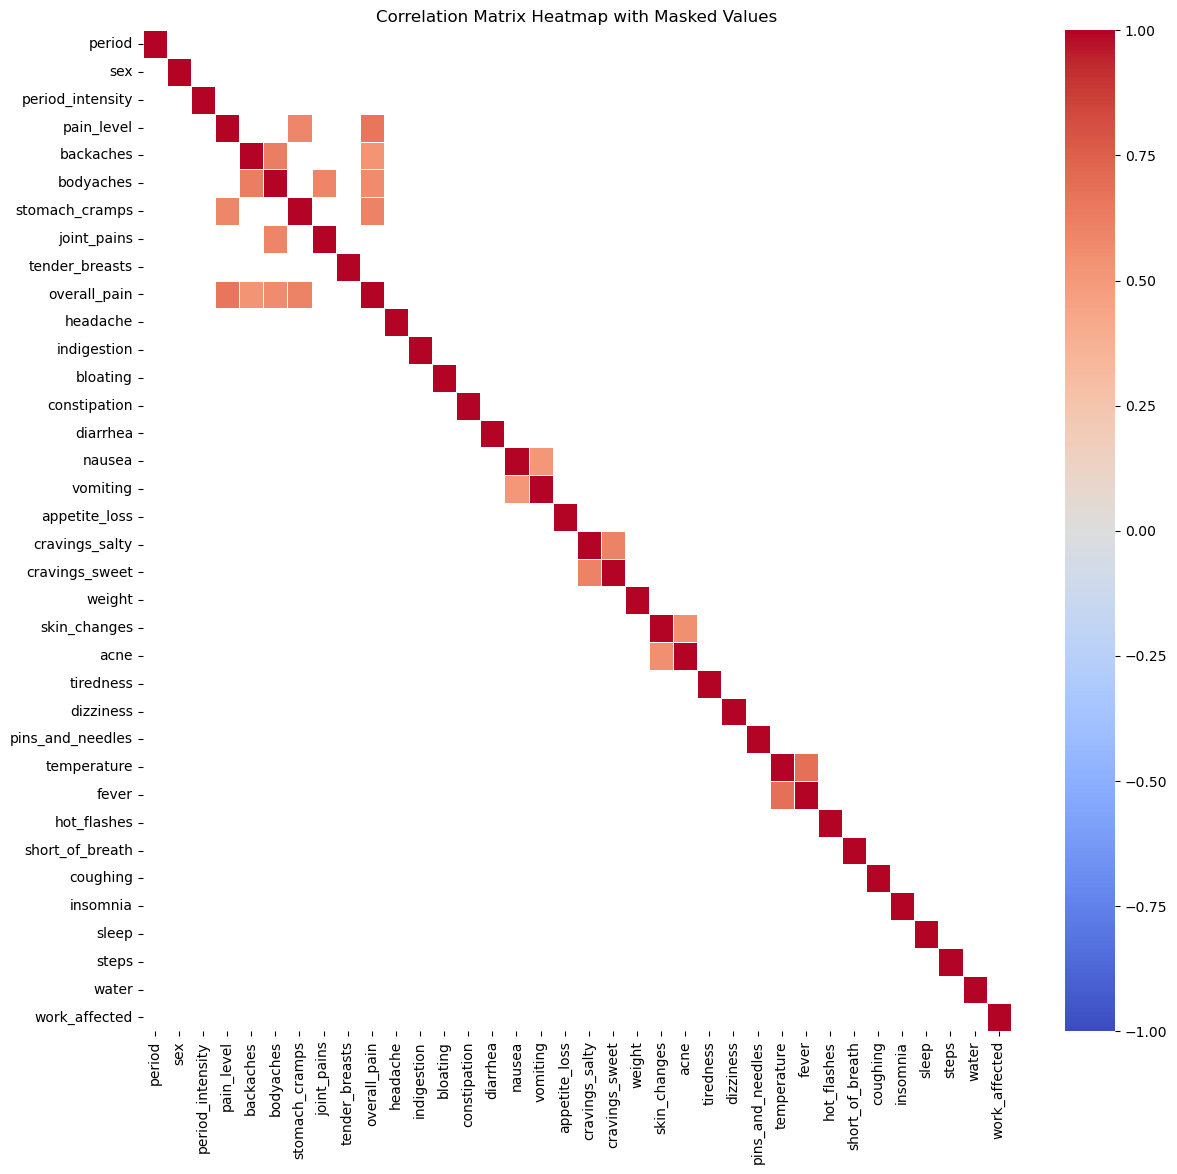

In [10]:
# Mask values in the correlation matrix that are between -0.5 and 0.5
mask = corr_matrix.map(lambda x: np.nan if -0.5 <= x < 0.5 else x)

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(14, 13))
sns.heatmap(mask, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix Heatmap with Masked Values")
plt.savefig('fig/corr_mask_heatmap.png', dpi=300)  
plt.show()

In [11]:
# Read in filtered data
file_path = 'data/agg_data.csv'
agg_df = pd.read_csv(file_path)
agg_df.shape

(1918, 35)

In [12]:
# Compute the correlation matrix for numeric columns
agg_corr_matrix = agg_df[['period', 'sex', 'period_intensity', 'pain_level', 'backaches', 'bodyaches',  
                               'stomach_cramps', 'joint_pains', 'tender_breasts', 'overall_pain', 'headache',
                             'indigestion', 'bloating', 'constipation', 'diarrhea', 'nausea', 'vomiting', 
                             'appetite_loss', 'cravings_salty', 'cravings_sweet', 'weight',
                             'skin_changes', 'acne', 'tiredness', 'dizziness', 'pins_and_needles',
                             'temperature',   'fever', 'hot_flashes', 'short_of_breath', 'coughing', 
                             'insomnia', 'sleep', 'log_steps', 'work_affected']].corr()

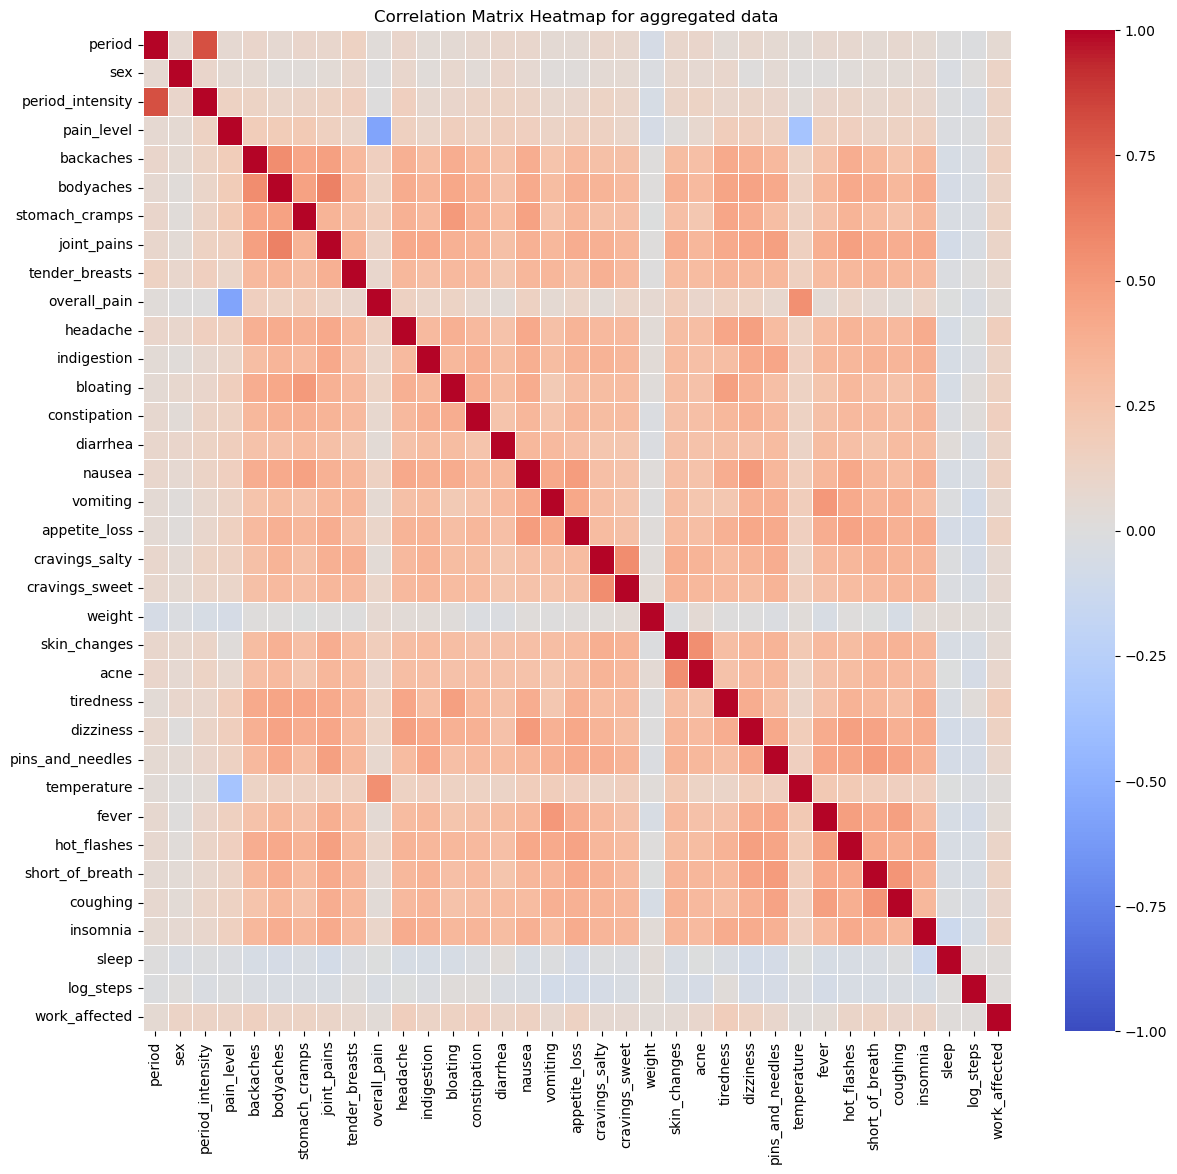

In [13]:
# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(14, 13))
sns.heatmap(agg_corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix Heatmap for aggregated data")
plt.savefig('fig/corr_agg_heatmap.png', dpi=300)  
plt.show()

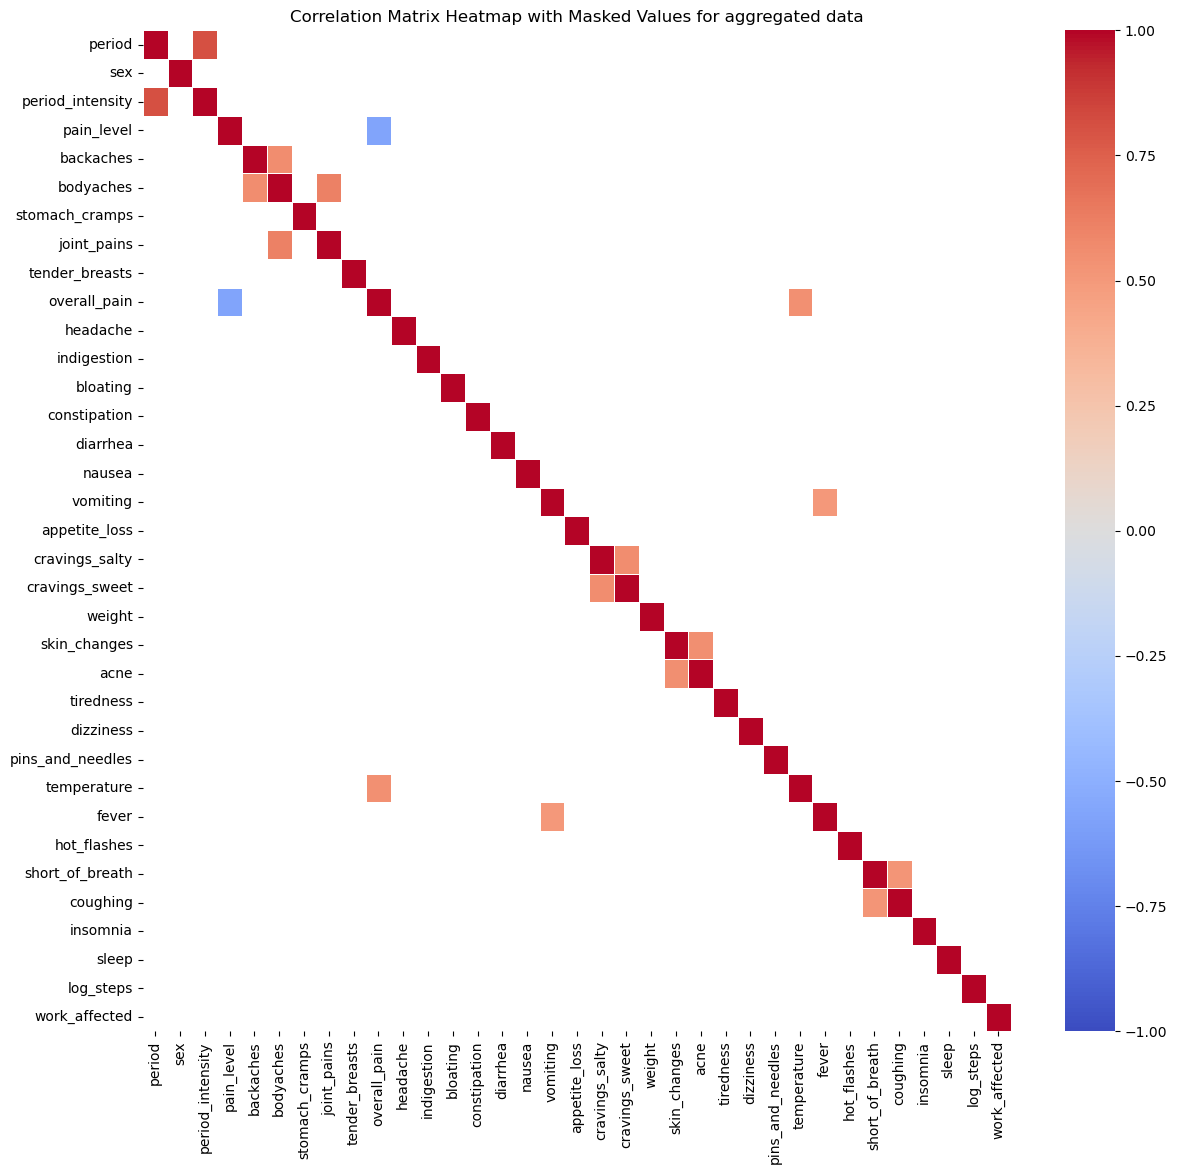

In [14]:
mask_agg = agg_corr_matrix.map(lambda x: np.nan if -0.5 <= x < 0.5 else x)
# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(14, 13))
sns.heatmap(mask_agg, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix Heatmap with Masked Values for aggregated data")
plt.savefig('fig/corr_agg_mask_heatmap.png', dpi=300)  
plt.show()